# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

In [2]:
df = pd.read_csv('/Users/atemlyakova/Documents/HSE/Master_thesis/data/diplom_viborka.csv',
                 encoding='cp1251', 
                 sep=';', 
                 low_memory=False,
                 usecols=lambda x: 'Unnamed' not in x)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
# Drop private columns
df = df.drop(columns=['Имя', 'Отчество', 'Дата рождения'])

In [5]:
df.head()

,Идентификатор,Идентификатор (расшифровка),Пол,Пол (расшифровка),Источник информации о ФИО и адресах,Источник информации о ФИО и адресах (расшифровка),"Дата регистрации, взятия на учет,завершения очередн.этапа лечения,снятия с учета",Год из даты регистрации,Группа пациента,Группа пациента (расшифровка),Этап слежения,Этап слежения (расшифровка),Откуда прибыл больной,Откуда прибыл больной (расшифровка),"Регистрация прибывшего в территории, откуда прибыл","Регистрация прибывшего в территории, откуда прибыл (расшифровка)",Год первичного выявления туберкулеза у прибывшего,Регистрация прибывшего в данном субъекте,Регистрация прибывшего в данном субъекте (расшифровка),Место стационарного лечения,Место стационарного лечения (расшифровка),Место амбулаторного лечения,Место амбулаторного лечения (расшифровка),Место санаторного лечения,Место санаторного лечения (расшифровка),------------------------------,Отмена диагноза туберкулеза (диагноз не подтвержден),Дата отмены диагноза,Возраст (рассчитывается автоматически),Житель,Житель (расшифровка),Социально-профессиональная принадлежность,Социально-профессиональная принадлежность (расшифровка),Принадлежность к льготным категориям,Принадлежность к льготным категориям (расшифровка),Принадлежность к декретированным контингентам,Принадлежность к декретированным контингентам (расшифровка),Место работы/учебы,Должность,Наличие арх.данных об адресе работы,Категория населения,Категория населения (расшифровка),Категория населения в пенитенциарной системе,Категория населения в пенитенциарной системе (расшифровка),Категория населения для прибывшего,Категория населения для прибывшего (расшифровка),Дата поступления в СИЗО,Время между поступлением в СИЗО и регистрацией как больного туберкулезом,Был ли в заключении ранее,Был ли в заключении ранее (расшифровка),Бытовое пьянство,Бытовое пьянство (расшифровка),Состоит на учете в наркологическом диспансере,Состоит на учете в наркологическом диспансере (расшифровка),Сведения о вакцинации БЦЖ,Сведения о вакцинации БЦЖ (расшифровка),Наличие арх.данных о факт. прож.,Субъект РФ где имеет постоянную регистрацию - иногородний,Субъект РФ где имеет постоянную регистрацию - иногородний (расшифровка),Страны ближнего зарубежья,Страны ближнего зарубежья (расшифровка),Страны дальнего зарубежья,Страны дальнего зарубежья (расшифровка),Округ,Округ (расшифровка),Район или поселение,Район или поселение (расшифровка),Объединения округов,Объединения округов (расшифровка),Объединения районов,Объединения районов (расшифровка),Сколько лет проживает в Москве,Сколько лет проживает в Москве (расшифровка),Проживает в субъекте с рождения,С какого года имеет постоянную регистрацию в г. Москве. (для пост. жителей),Постоянная регистрация с рождения,С какого года имеет гражданство РФ,Гражданство РФ с рождения,Жилищные условия,Жилищные условия (расшифровка),Место рождения,Место рождения (расшифровка),Место рождения - субъект РФ,Место рождения - субъект РФ (расшифровка),Место рождения - страна ближнего зарубежья,Место рождения - страна ближнего зарубежья (расшифровка),Место рождения - страна дальнего зарубежья,Место рождения - страна дальнего зарубежья (расшифровка),"Филиал или структурное подразделение, где пациент наблюдается","Филиал или структурное подразделение, где пациент наблюдается (расшифровка)",Филиал МНПЦ БТ,Филиал МНПЦ БТ (расшифровка),Наличие архивных данных на участки и поликлиники,Диспансерный учет,Диспансерный учет (расшифровка),Установленный / заключительный диагноз (основной),Установленный / заключительный диагноз (основной) (расшифровка),Диагноз туберкулеза легких,Диагноз туберкулеза легких (расшифровка),Инфильтративный туберкулез,Инфильтративный туберкулез (расшифровка),"Туберкулез ВДП, бронхов, плевры и ВГЛУ (основной)","Туберкулез ВДП, бронхов, плевры и ВГЛУ (основной) (расшифровка)","ТОД, комбинированный с пылевыми заболеваниями",Диагноз внелегочного туберкулеза (основной),Диагноз внелегочного туберкулеза (основной) (расшифровка),Форма туберкулеза мочеполовой системы,Форма

In [6]:
# Show data types
data_types = df.dtypes
data_types.value_counts()

object     452
float64      1
Name: count, dtype: int64

In [7]:
# Identify numeric column
df.select_dtypes(include=['number']).columns.tolist()

['Идентификатор (расшифровка)']

In [8]:
df.describe(include=['object'])

,Идентификатор,Пол,Пол (расшифровка),Источник информации о ФИО и адресах,Источник информации о ФИО и адресах (расшифровка),"Дата регистрации, взятия на учет,завершения очередн.этапа лечения,снятия с учета",Год из даты регистрации,Группа пациента,Группа пациента (расшифровка),Этап слежения,Этап слежения (расшифровка),Откуда прибыл больной,Откуда прибыл больной (расшифровка),"Регистрация прибывшего в территории, откуда прибыл","Регистрация прибывшего в территории, откуда прибыл (расшифровка)",Год первичного выявления туберкулеза у прибывшего,Регистрация прибывшего в данном субъекте,Регистрация прибывшего в данном субъекте (расшифровка),Место стационарного лечения,Место стационарного лечения (расшифровка),Место амбулаторного лечения,Место амбулаторного лечения (расшифровка),Место санаторного лечения,Место санаторного лечения (расшифровка),------------------------------,Отмена диагноза туберкулеза (диагноз не подтвержден),Дата отмены диагноза,Возраст (рассчитывается автоматически),Житель,Житель (расшифровка),Социально-профессиональная принадлежность,Социально-профессиональная принадлежность (расшифровка),Принадлежность к льготным категориям,Принадлежность к льготным категориям (расшифровка),Принадлежность к декретированным контингентам,Принадлежность к декретированным контингентам (расшифровка),Место работы/учебы,Должность,Наличие арх.данных об адресе работы,Категория населения,Категория населения (расшифровка),Категория населения в пенитенциарной системе,Категория населения в пенитенциарной системе (расшифровка),Категория населения для прибывшего,Категория населения для прибывшего (расшифровка),Дата поступления в СИЗО,Время между поступлением в СИЗО и регистрацией как больного туберкулезом,Был ли в заключении ранее,Был ли в заключении ранее (расшифровка),Бытовое пьянство,Бытовое пьянство (расшифровка),Состоит на учете в наркологическом диспансере,Состоит на учете в наркологическом диспансере (расшифровка),Сведения о вакцинации БЦЖ,Сведения о вакцинации БЦЖ (расшифровка),Наличие арх.данных о факт. прож.,Субъект РФ где имеет постоянную регистрацию - иногородний,Субъект РФ где имеет постоянную регистрацию - иногородний (расшифровка),Страны ближнего зарубежья,Страны ближнего зарубежья (расшифровка),Страны дальнего зарубежья,Страны дальнего зарубежья (расшифровка),Округ,Округ (расшифровка),Район или поселение,Район или поселение (расшифровка),Объединения округов,Объединения округов (расшифровка),Объединения районов,Объединения районов (расшифровка),Сколько лет проживает в Москве,Сколько лет проживает в Москве (расшифровка),Проживает в субъекте с рождения,С какого года имеет постоянную регистрацию в г. Москве. (для пост. жителей),Постоянная регистрация с рождения,С какого года имеет гражданство РФ,Гражданство РФ с рождения,Жилищные условия,Жилищные условия (расшифровка),Место рождения,Место рождения (расшифровка),Место рождения - субъект РФ,Место рождения - субъект РФ (расшифровка),Место рождения - страна ближнего зарубежья,Место рождения - страна ближнего зарубежья (расшифровка),Место рождения - страна дальнего зарубежья,Место рождения - страна дальнего зарубежья (расшифровка),"Филиал или структурное подразделение, где пациент наблюдается","Филиал или структурное подразделение, где пациент наблюдается (расшифровка)",Филиал МНПЦ БТ,Филиал МНПЦ БТ (расшифровка),Наличие архивных данных на участки и поликлиники,Диспансерный учет,Диспансерный учет (расшифровка),Установленный / заключительный диагноз (основной),Установленный / заключительный диагноз (основной) (расшифровка),Диагноз туберкулеза легких,Диагноз туберкулеза легких (расшифровка),Инфильтративный туберкулез,Инфильтративный туберкулез (расшифровка),"Туберкулез ВДП, бронхов, плевры и ВГЛУ (основной)","Туберкулез ВДП, бронхов, плевры и ВГЛУ (основной) (расшифровка)","ТОД, комбинированный с пылевыми заболеваниями",Диагноз внелегочного туберкулеза (основной),Диагноз внелегочного туберкулеза (основной) (расшифровка),Форма туберкулеза мочеполовой системы,Форма туберкулеза мочеполовой сис

In [8]:
# Drop first row with technical information
df = df.drop(df.index[[0,1]])

In [10]:
# Drop dublicated columns
df = df.drop(df.filter(regex='(расшифровка)').columns, axis=1)

In [11]:
# Check missing values
df.isnull().sum()

Идентификатор                                                                            0
Пол                                                                                      0
Источник информации о ФИО и адресах                                                    549
Дата регистрации, взятия на учет,завершения очередн.этапа лечения,снятия с учета         0
Год из даты регистрации                                                                  0
                                                                                     ...  
Срок временной нетрудоспособности до начала этапа (мес.)                            254255
Причина первичного выхода на инвалидность                                            54711
Предполагаемая дата очередного контроля/обследования                                212213
Вид и цель контроля,обследования и представления                                     49417
Представление на ЦВКК                                                                54980

In [12]:
def drop_columns_with_missing_values(df, threshold=0.9):
    """Drop columns with more than the specified percentage of missing values."""
    missing_percentage = df.isnull().mean()
    columns_to_keep = missing_percentage[missing_percentage <= threshold].index
    return df[columns_to_keep]

In [13]:
# Drop columns with more than 90% missing values
df = drop_columns_with_missing_values(df)

In [14]:
df.head()

,Идентификатор,Пол,Источник информации о ФИО и адресах,"Дата регистрации, взятия на учет,завершения очередн.этапа лечения,снятия с учета",Год из даты регистрации,Группа пациента,Этап слежения,Откуда прибыл больной,Место стационарного лечения,Место амбулаторного лечения,Место санаторного лечения,------------------------------,Отмена диагноза туберкулеза (диагноз не подтвержден),Возраст (рассчитывается автоматически),Житель,Социально-профессиональная принадлежность,Принадлежность к льготным категориям,Принадлежность к декретированным контингентам,Место работы/учебы,Должность,Категория населения,Категория населения в пенитенциарной системе,Был ли в заключении ранее,Бытовое пьянство,Состоит на учете в наркологическом диспансере,Субъект РФ где имеет постоянную регистрацию - иногородний,Страны ближнего зарубежья,Страны дальнего зарубежья,Округ,Район или поселение,Сколько лет проживает в Москве,Жилищные условия,Место рождения,Место рождения - субъект РФ,Место рождения - страна ближнего зарубежья,Место рождения - страна дальнего зарубежья,"Филиал или структурное подразделение, где пациент наблюдается",Филиал МНПЦ БТ,Наличие архивных данных на участки и поликлиники,Диспансерный учет,Установленный / заключительный диагноз (основной),Диагноз туберкулеза легких,Инфильтративный туберкулез,"Туберкулез ВДП, бронхов, плевры и ВГЛУ (основной)","ТОД, комбинированный с пылевыми заболеваниями",Диагноз внелегочного туберкулеза (основной),Форма туберкулеза мочеполовой системы,Форма костно-суставного туберкулеза,Форма туберкулеза глаз,Прочие локализации внелегочного туберкулеза (основного диагноза),Наличие сочетанной (генерализованной) локализации,Посттуберкулезные изменения органов дыхания после окончания этапа,Наличие ВИЧ-инфекции,Распад,Фаза туберкулеза органов дыхания,Фаза внелегочного туберкулеза,Бактериовыделение,___ подтверждение методом простой бактериоскопии,___ подтверждение методом люм. микроскопии,___ подтверждение методом посева,Основной лабораторный метод подтверждения бактериовыделения,Наличие ВИЧ-инфекции.1,Впервые зарегистр. случай ВИЧ/ТБ (ф. № 263),Стадия ВИЧ-инфекции,Наличие осложнений ТОД,Наличие осложнений ВТ,Гепатит B,Гепатит C,Сифилис,"Потребитель ПАВ, наркозависимость","Сопутствующее заболевание, как группа риска по туберкулезу",Наличие COVID-19,Причина смерти - COVID-19,Определение лекарственной устойчивости,Номер культуры,Устойчивость к R (рифампицин),Устойчивость к H (изониазид),Устойчивость к E (этамбутол),Устойчивость к S (стрептомицин),Тип устойчивости,Дата появления первых симптомов заболевания,Место выявления,Какое учреждение заполнило извещение?,Метод выявления туберкулеза,"Обстоятельства, при которых выявлено заболевание",Сроки предыдущего ФГ обследования,Результат предыдущего ФГ обследования,Выявлен из наблюдаемых в тубучреждениях групп,Дата первого обращения за медицинской помощью,Медицинская группа риска,Своевременность выявления рецидива,Дата ЦВКК / ВК,Учреждение проведения ЦВКК / ВК,Группа учета ТОД по приказу 324 (до 2004),Группа учета ВЛТ по приказу 324 (до 2004),"Группа учета, дети и подростки, по приказу 324 (до 2003)",Установлена группа учета (взрослые до 2020),Установлена группа учета (дети и подростки до 2020),Установленная группа учета,Диагноз осложнения БЦЖ,Проведение идентификации микобактерий БЦЖ,"Время, прошедшее от даты обращения до ЦВКК (рассч.автом.)",Консультация фтизиохирурга,Хирургическое лечение на данном этапе лечения,Хирургическое лечение по поводу туберкулеза органов дыхания,Хирургическое лечение по поводу внелегочного туберкулеза,Характер контакта,Объект контакта,Тип контакта,Исход диспансерного слежения,Результаты слежения за пациентом на данном этапе лечения/наблюдения,Причины прерывания наблюдения,Из какой ГДУ переведен пациент (до 2020),Из какой ГДУ переведен пациент (2020),Длительность пребывания в данной группе учета (мес),Причины задеpжки в гpуппе учета,Выбытие пациента,Причины снятия с учета,"Выбытие пациента, движение внутри города",Выбытие пациента за пределы города (субъекта РФ

In [17]:
print('Number of patients: ', len(df['Идентификатор'].unique()))

Number of patients:  79541


In [18]:
print('Average number of records for patient: ',len(df)/len(df['Идентификатор'].unique()))

Average number of records for patient:  3.196527576972882


In [19]:
print('Number of records: ', len(df))

Number of records:  254255


In [20]:
# Convert year to numeric
df['Год из даты регистрации'] = pd.to_numeric(df['Год из даты регистрации'], errors='coerce')

# Count occurrences of each year
year_counts = df['Год из даты регистрации'].value_counts().sort_index()

# Create a DataFrame for the year counts
year_table = pd.DataFrame(year_counts).reset_index()
year_table.columns = ['Year', 'Number of Records']

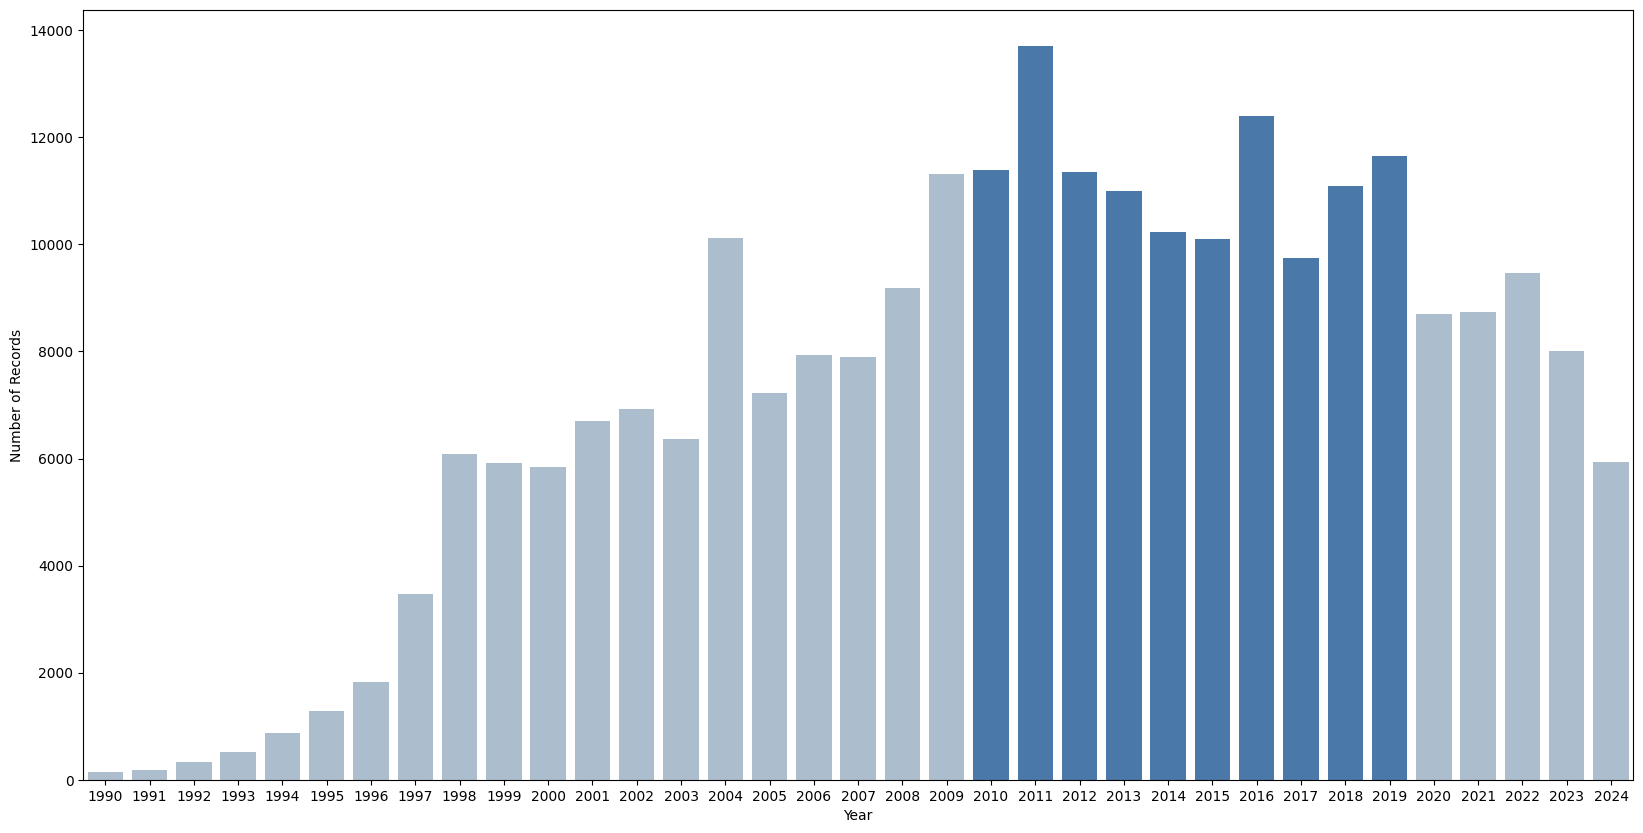

In [21]:
# Create the histogram
plt.figure(figsize=(20, 10))  
colors = ['#acbdcd' if year < 2010 or year > 2019 else '#4A78A8' for year in year_counts.index]
plt.bar(year_counts.index, year_counts.values, color=colors)

plt.xlabel('Year')
plt.ylabel('Number of Records')
#plt.title('Histogram of Number of Records per Year')
plt.xticks(year_counts.index) 
plt.xlim([1989.5, 2024.5])
plt.show()

In [ ]:
# Filter data by years
df_filtered = df[(df['Год из даты регистрации'] >= 2010) & (df['Год из даты регистрации'] <= 2019)]
print(f"Number of records from 2010 to 2019 years: {df_filtered.shape[0]}")

Number of records from 2010 to 2019 years: 112653


In [23]:
print('Number of patients: ', len(df_filtered['Идентификатор'].unique()))

Number of patients:  46241


In [24]:
# Make a copy early to avoid SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Convert to datetime and store in a new column
df_filtered['Дата регистрации'] = pd.to_datetime(
    df_filtered['Год из даты регистрации'], 
    format='%Y',
    errors='coerce'
)

# Use the new datetime column for grouping
first_records = df_filtered.groupby('Идентификатор')['Дата регистрации'].min().reset_index()
first_records.rename(columns={'Дата регистрации': 'Регистрация'}, inplace=True)

# Merge and filter
df_filtered = df_filtered.merge(first_records, on='Идентификатор', how='left')
df_filtered = df_filtered[
    df_filtered['Дата регистрации'] <= df_filtered['Регистрация'] + pd.DateOffset(years=1, months=6)
]

# Cleanup
df_filtered = df_filtered.drop(columns=['Регистрация', 'Дата регистрации'])

# Sort the DataFrame by 'Идентификатор' and 'Год из даты регистрации'
df_filtered = df_filtered.sort_values(by=['Идентификатор', 'Год из даты регистрации']).reset_index(drop=True)

#### Patients exclusion

In [27]:
# Identify patients with at least one record where 'Исход диспансерного слежения' is 5, 7, or 8
patients_to_exclude_by_outcome = df_filtered[
    df_filtered['Исход диспансерного слежения'].isin(['5', '7', '8'])
]['Идентификатор'].unique()

# Identify patients with at least one record where 'Отмена диагноза туберкулеза (диагноз не подтвержден)' is True
patients_to_exclude_by_diagnosis_cancellation = df_filtered[
    df_filtered['Отмена диагноза туберкулеза (диагноз не подтвержден)'] == 'true'
]['Идентификатор'].unique()

# Convert Age to numeric
df_filtered['Возраст (рассчитывается автоматически)'] = pd.to_numeric(
    df_filtered['Возраст (рассчитывается автоматически)'],
    errors='coerce'
)

# Identify patients to exclude by age criteria (only explicit boundaries)
patients_to_exclude_by_age = df_filtered[
    (df_filtered['Возраст (рассчитывается автоматически)'] < 18) |  
    (df_filtered['Возраст (рассчитывается автоматически)'] > 110)    
]['Идентификатор'].unique()

# Identify patients to exclude by population category
patients_to_exclude_by_catpopulation = df_filtered[
    df_filtered['Категория населения'] != '1'  
]['Идентификатор'].unique()

# Combine sets of patients to exclude
patients_to_exclude = (
    set(patients_to_exclude_by_outcome) | 
    set(patients_to_exclude_by_diagnosis_cancellation) | 
    set(patients_to_exclude_by_age) |
    set(patients_to_exclude_by_catpopulation)
)

# Filter out patients in the 'patients_to_exclude' list
df_filtered = df_filtered[~df_filtered['Идентификатор'].isin(patients_to_exclude)]

# Print the number of unique patients after exclusion
print('Number of patients after exclusion by conditions: ', len(df_filtered['Идентификатор'].unique()))

Number of patients after exclusion by conditions:  30487


In [28]:
#Get the first record for each patient from df_filtered
first_records = df_filtered.groupby('Идентификатор').head(1)

# Exclude records with 'посмертное выявление'
first_records = first_records[first_records['Исход диспансерного слежения'] != '6']


#### Creating target column

In [29]:
# Leave only last records
# Sort the DataFrame by 'Идентификатор' and 'Год из даты регистрации' to ensure chronological order
df_filtered = df_filtered.sort_values(by=['Идентификатор', 'Год из даты регистрации'])

# Get the last record for each patient
last_records = df_filtered.groupby('Идентификатор').tail(1)

# Filter patients where the last record's 'Исход диспансерного слежения' is not 0 
# AND where 'Исход диспансерного слежения' is not NaN
patients_with_non_zero_last_record = last_records[
    (last_records['Исход диспансерного слежения'] != '0') & 
    last_records['Исход диспансерного слежения'].notna()
]
print('Number of patients after exclusion by outcome: ', len(patients_with_non_zero_last_record['Идентификатор'].unique()))

Number of patients after exclusion by outcome:  24469


In [30]:
# Define the conditions
conditions = [
    patients_with_non_zero_last_record['Исход диспансерного слежения'].isin(['2', '4']),  # treatment success
    patients_with_non_zero_last_record['Исход диспансерного слежения'].isin(['1', '22']), # treatment fail
    patients_with_non_zero_last_record['Исход диспансерного слежения'] == '6'           # death
]

# Define the corresponding outputs for each condition
choices = [0, 1, 2] # treatment success, treatment fail, death

# Create the 'y' column using np.select()
y = np.select(conditions, choices, default=-1)  # Use -1 for values not covered by conditions
patients_with_non_zero_last_record.insert(0, 'y', y)

In [31]:
# Merge the first records with the 'y' column from patients_with_non_zero_last_record
result = pd.merge(
    first_records,
    patients_with_non_zero_last_record[['Идентификатор', 'y']],
    on='Идентификатор',
    how='inner'
)


## Basic dataframe

In [55]:
# Filter columns for basic dataframe
basic_df = result[['y', 'Пол', 'Возраст (рассчитывается автоматически)', 'Социально-профессиональная принадлежность',
                                               'Был ли в заключении ранее', 'Бытовое пьянство', 'Жилищные условия',
                                               'Диагноз туберкулеза легких',
                                               'Инфильтративный туберкулез', 'Наличие ВИЧ-инфекции', 'Распад',
                                               'Фаза туберкулеза органов дыхания', 'Фаза внелегочного туберкулеза', 'Бактериовыделение',
                                               'Сопутствующее заболевание, как группа риска по туберкулезу', 
                                               'Устойчивость к R (рифампицин)', 'Устойчивость к H (изониазид)',
                                               'Устойчивость к E (этамбутол)', 'Устойчивость к S (стрептомицин)',
                                               'Метод выявления туберкулеза', 'Медицинская группа риска',
                                               'Хирургическое лечение на данном этапе лечения', 'Инвалидность']]

In [56]:
basic_df.head()

,y,Пол,Возраст (рассчитывается автоматически),Социально-профессиональная принадлежность,Был ли в заключении ранее,Бытовое пьянство,Жилищные условия,Диагноз туберкулеза легких,Инфильтративный туберкулез,Наличие ВИЧ-инфекции,Распад,Фаза туберкулеза органов дыхания,Фаза внелегочного туберкулеза,Бактериовыделение,"Сопутствующее заболевание, как группа риска по туберкулезу",Устойчивость к R (рифампицин),Устойчивость к H (изониазид),Устойчивость к E (этамбутол),Устойчивость к S (стрептомицин),Метод выявления туберкулеза,Медицинская группа риска,Хирургическое лечение на данном этапе лечения,Инвалидность
0,0,2,92.0,10,1,1,5,1,5,1,1,2,1,1,6,0,0,0,0,5,15,0,0
1,0,1,36.0,1,1,1,1,2,0,0,1,2,1,1,NaN,0,0,0,0,4,0,0,0
2,0,2,25.0,2,1,1,0,0,0,0,0,1,1,0,NaN,0,0,0,0,0,0,0,0
3,1,1,84.0,10,1,1,5,0,0,1,1,2,1,2,4,2,2,2,2,5,1,0,0
4,0,1,27.0,12,1,1,4,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0


In [57]:
basic_df.shape

(23135, 23)

## Missing values

In [58]:
# Checking amount of Nan
(basic_df.isna().sum()/len(basic_df)*100).apply(lambda x: f"{x:.2f}%")

y                                                              0.00%
Пол                                                            0.00%
Возраст (рассчитывается автоматически)                         0.04%
Социально-профессиональная принадлежность                      0.00%
Был ли в заключении ранее                                      0.00%
Бытовое пьянство                                               0.00%
Жилищные условия                                               0.00%
Диагноз туберкулеза легких                                     2.04%
Инфильтративный туберкулез                                     4.07%
Наличие ВИЧ-инфекции                                           0.00%
Распад                                                         1.24%
Фаза туберкулеза органов дыхания                               1.69%
Фаза внелегочного туберкулеза                                  6.21%
Бактериовыделение                                              1.42%
Сопутствующее заболевание, как гру

# EDA

## Age

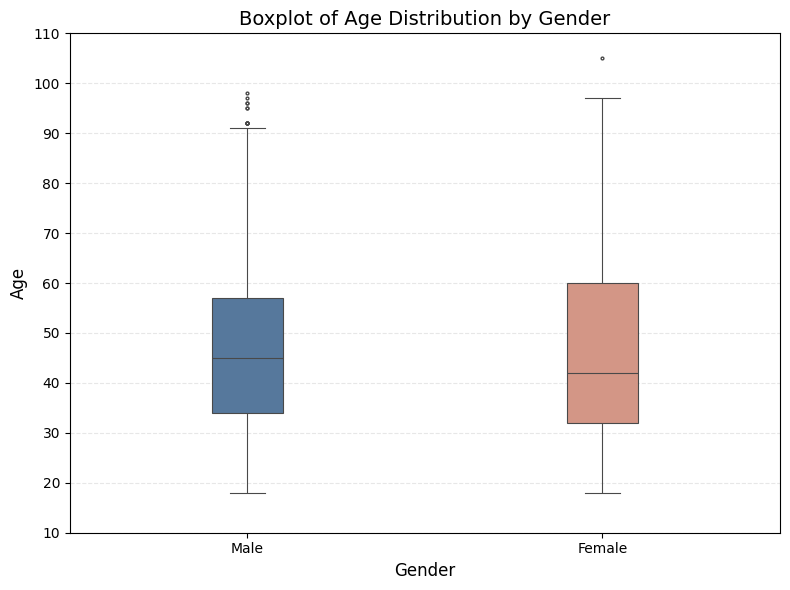

In [59]:
# Creating boxplot
male_ages = basic_df[basic_df['Пол'] == '1']['Возраст (рассчитывается автоматически)']
female_ages = basic_df[basic_df['Пол'] == '2']['Возраст (рассчитывается автоматически)']

data = pd.DataFrame({
    'Age': np.concatenate([male_ages, female_ages]),
    'Gender': ['Male'] * len(male_ages) + ['Female'] * len(female_ages)
})


plt.figure(figsize=(8, 6))

sns.boxplot(
    x='Gender',
    y='Age',
    hue='Gender',
    data=data,
    palette=['#4A78A8', '#E08E79'],  
    linewidth=0.8,
    width=0.2,
    flierprops=dict(marker='o', markersize=2, linestyle='none'),
    orient='v',
    legend=False 
)

for artist in plt.gca().artists:
    for line in artist.lines:
        if isinstance(line, plt.Line2D) and line.get_linestyle() == '--':
            line.set_color('#2B4162')  
            line.set_linewidth(0.8)

plt.title('Boxplot of Age Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.yticks(np.arange(10, 120, 10))  
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [60]:
# Calculate age statistics by gender
max_male, min_male, std_male, mean_male = male_ages.max(), male_ages.min(), male_ages.std(), male_ages.mean()
max_female, min_female, std_female, mean_female = female_ages.max(), female_ages.min(), female_ages.std(), female_ages.mean()
q1_male, med_male, q3_male = male_ages.quantile([0.25, 0.5, 0.75])
q1_female, med_female, q3_female = female_ages.quantile([0.25, 0.5, 0.75])

# Create the summary table
summary_table = pd.DataFrame({
    'Statistic': ['Min', 'Max', 'Mean', 'Std', 'Q1 (25%)', 'Median (50%)', 'Q3 (75%)'],
    'Male': [min_male, max_male, mean_male, std_male, q1_male, med_male, q3_male],
    'Female': [min_female, max_female, mean_female, std_female, q1_female, med_female, q3_female]
})

summary_table.set_index('Statistic', inplace=True)
summary_table = summary_table.round(1)
summary_table

,Male,Female
Statistic,,
Min,18.0,18.0
Max,98.0,105.0
Mean,46.5,46.7
Std,15.2,18.3
Q1 (25%),34.0,32.0
Median (50%),45.0,42.0
Q3 (75%),57.0,60.0


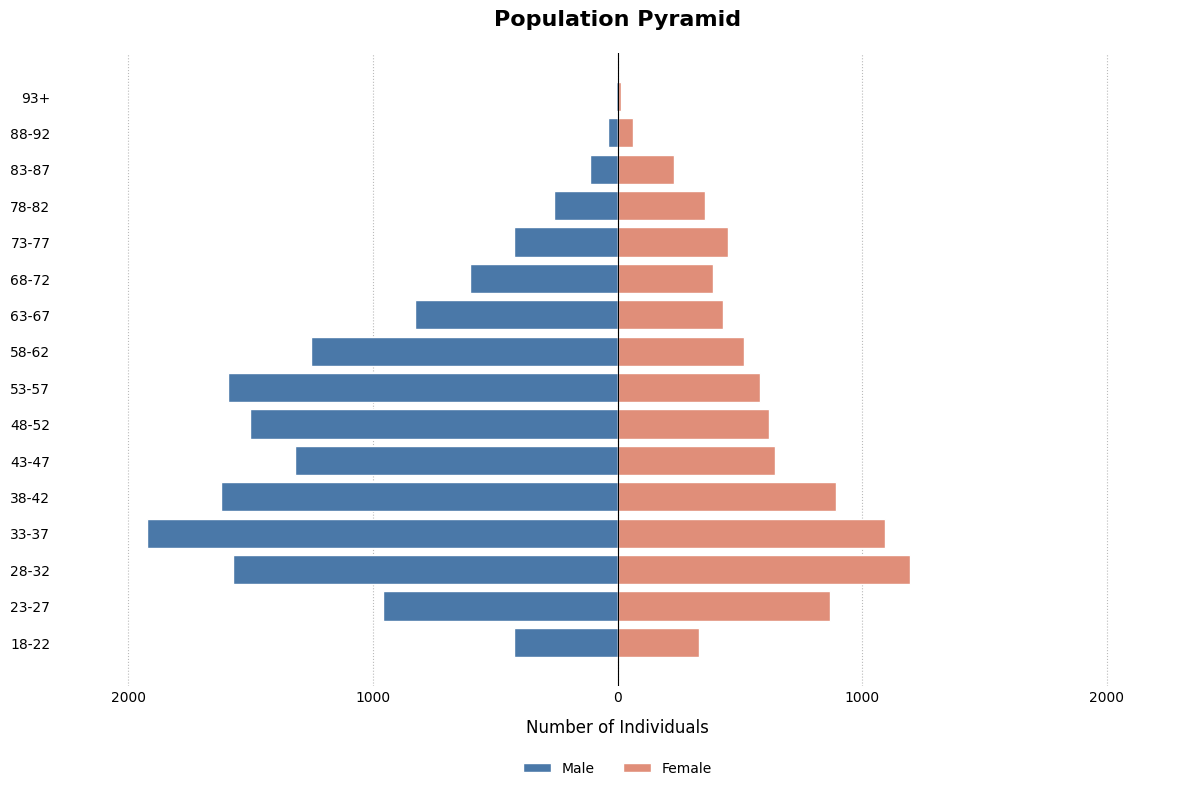

In [61]:
# Configuration
age_min, age_max = 18, 105
step = 5
bin_edges = np.arange(age_min, age_max + step, step)

# Remove last three edges and add max age to include 93+
bin_edges = list(bin_edges)[:-3]
bin_edges.append(age_max)

basic_df_copy = basic_df.copy()
basic_df_copy['Age_Bin'] = pd.cut(
    basic_df_copy['Возраст (рассчитывается автоматически)'],
    bins=bin_edges,
    right=False
)

# Aggregate counts by gender and age bin
counts = (
    basic_df_copy
    .groupby(['Пол', 'Age_Bin'], observed=True)  
    .size()
    .unstack('Пол', fill_value=0)
    .round()
    .astype(int)
)
counts.columns = ['Male', 'Female']
counts = counts[['Male', 'Female']]

# Prepare data for plotting
male_counts = -counts['Male'].values
female_counts = counts['Female'].values

# Create age labels (start to end-1)
age_labels = [
    f"{int(bin_edges[i])}-{int(bin_edges[i+1] - 1)}"
    for i in range(len(bin_edges) - 1)
]
age_labels[-1] = '93+'  # Replace last label with 93+

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.8

male_color = '#4A78A8'
female_color = '#E08E79'
grid_color = '#777'

ax.barh(
    y=range(len(age_labels)),
    width=male_counts,
    height=bar_width,
    color=male_color,
    edgecolor='white',
    label='Male'
)
ax.barh(
    y=range(len(age_labels)),
    width=female_counts,
    height=bar_width,
    color=female_color,
    edgecolor='white',
    label='Female'
)

# Y-axis
ax.set_yticks(range(len(age_labels)))
ax.set_yticklabels(age_labels, fontsize=10)
ax.tick_params(axis='both', length=0)

# X-axis
ax.set_xlabel('Number of Individuals', fontsize=12, labelpad=10)
ax.xaxis.set_major_formatter(lambda x, pos: f'{abs(x):.0f}')
ax.set_xlim(-2300, 2300)

# Title and layout
ax.set_title('Population Pyramid', fontsize=16, fontweight='bold', pad=20)
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.5, linestyle='dotted', color=grid_color)
ax.set_axisbelow(True)

# Styling spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

## Gender

In [62]:
print("Gender counts:")
print((basic_df['Пол'].value_counts()/len(basic_df)*100).apply(lambda x: f"{x:.2f}%"))

Gender counts:
Пол
1    62.42%
2    37.58%
Name: count, dtype: object


In [63]:
# Creating the crosstab
cross_tab = pd.crosstab(basic_df['Пол'], basic_df['y'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent = cross_tab_percent.rename(columns={0: 'Success', 1: 'Fail', 2: 'Death'})
cross_tab_percent = cross_tab_percent.round(2)

print("Percentage Distribution of Target Classes by Gender:")
print(cross_tab_percent)

Percentage Distribution of Target Classes by Gender:
y    Success   Fail  Death
Пол                       
1      68.13  23.07   8.81
2      76.43  18.18   5.38


## Сomorbid diseases

In [64]:
# Create dummy variables for each number
disease_dummies = basic_df['Сопутствующее заболевание, как группа риска по туберкулезу'].str.get_dummies(sep=',')
disease_dummies = disease_dummies.rename(columns=lambda x: f"disease_{x}")
for col in disease_dummies.columns:
    disease_dummies[col] = disease_dummies[col].astype('category')

basic_df = pd.concat([basic_df, disease_dummies], axis=1)

# Create the count_disease column (excluding '0' and '1')
basic_df['count_disease'] = basic_df['Сопутствующее заболевание, как группа риска по туберкулезу'].apply(
    lambda x: len([num for num in x.split(',') if num not in {'0', '1'}]) 
    if pd.notnull(x) and x != '' 
    else 0
)
basic_df['count_disease'] = basic_df['count_disease'].astype('int')
basic_df = basic_df.drop(columns='Сопутствующее заболевание, как группа риска по туберкулезу')
basic_df

,y,Пол,Возраст (рассчитывается автоматически),Социально-профессиональная принадлежность,Был ли в заключении ранее,Бытовое пьянство,Жилищные условия,Диагноз туберкулеза легких,Инфильтративный туберкулез,Наличие ВИЧ-инфекции,Распад,Фаза туберкулеза органов дыхания,Фаза внелегочного туберкулеза,Бактериовыделение,Устойчивость к R (рифампицин),Устойчивость к H (изониазид),Устойчивость к E (этамбутол),Устойчивость к S (стрептомицин),Метод выявления туберкулеза,Медицинская группа риска,Хирургическое лечение на данном этапе лечения,Инвалидность,disease_1,disease_10,disease_11,disease_12,disease_13,disease_14,disease_15,disease_16,disease_17,disease_18,disease_19,disease_2,disease_3,disease_4,disease_5,disease_6,disease_7,disease_8,disease_9,count_disease
0,0,2,92.0,10,1,1,5,1,5,1,1,2,1,1,0,0,0,0,5,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,36.0,1,1,1,1,2,0,0,1,2,1,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,25.0,2,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,84.0,10,1,1,5,0,0,1,1,2,1,2,2,2,2,2,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,27.0,12,1,1,4,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23130,0,1,63.0,10,1,1,2,7,0,1,1,2,1,1,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2
23131,0,2,48.0,2,1,1,5,1,4,0,1,0,NaN,1,NaN,NaN,NaN,NaN,5,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23132,1,1,85.0,10,1,1,4,1,1,1,2,2,1,2,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
23133,0,1,28.0,5,1,1,5,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2


In [65]:
# Map the columns temporarily (without modifying the original DataFrame)
mapped_disease = basic_df['disease_17'].map({0: 0, 1: 1})         # 0: No HIV, 1: Has HIV
mapped_hiv = basic_df['Наличие ВИЧ-инфекции'].map({'1': 0, '2': 1})   # 1: No HIV, 2: Has HIV

# Combine into a DataFrame for comparison (drops rows where either is NaN)
comparison = pd.DataFrame({
    'disease_17': mapped_disease,
    'hiv': mapped_hiv
}).dropna()

# Check agreement
matches = (comparison['disease_17'] == comparison['hiv'])
num_matches = matches.sum()
total_comparable = len(comparison)

print(f"Matches: {num_matches} out of {total_comparable}")
print(f"Accuracy: {num_matches / total_comparable:.2%}")

Matches: 20773 out of 20774
Accuracy: 100.00%


In [66]:
# drop 'Наличие ВИЧ-инфекции' column
basic_df = basic_df.drop(columns='Наличие ВИЧ-инфекции')
basic_df.columns

Index(['y', 'Пол', 'Возраст (рассчитывается автоматически)',
       'Социально-профессиональная принадлежность',
       'Был ли в заключении ранее', 'Бытовое пьянство', 'Жилищные условия',
       'Диагноз туберкулеза легких', 'Инфильтративный туберкулез', 'Распад',
       'Фаза туберкулеза органов дыхания', 'Фаза внелегочного туберкулеза',
       'Бактериовыделение', 'Устойчивость к R (рифампицин)',
       'Устойчивость к H (изониазид)', 'Устойчивость к E (этамбутол)',
       'Устойчивость к S (стрептомицин)', 'Метод выявления туберкулеза',
       'Медицинская группа риска',
       'Хирургическое лечение на данном этапе лечения', 'Инвалидность',
       'disease_1', 'disease_10', 'disease_11', 'disease_12', 'disease_13',
       'disease_14', 'disease_15', 'disease_16', 'disease_17', 'disease_18',
       'disease_19', 'disease_2', 'disease_3', 'disease_4', 'disease_5',
       'disease_6', 'disease_7', 'disease_8', 'disease_9', 'count_disease'],
      dtype='object')

## Socio-professional background

In [67]:
(basic_df['Социально-профессиональная принадлежность'].value_counts()/len(basic_df)*100).apply(lambda x: f"{x:.2f}%")

Социально-профессиональная принадлежность
12    38.37%
2     19.60%
10    13.18%
1     11.11%
11     6.97%
4      4.08%
13     2.38%
7      1.97%
0      1.32%
6      0.57%
5      0.43%
3      0.02%
9      0.00%
8      0.00%
Name: count, dtype: object

In [69]:
# Show patients with mistakes in socio-professional background
basic_df[(basic_df['Социально-профессиональная принадлежность']=='8') | (basic_df['Социально-профессиональная принадлежность']=='9')]

,y,Пол,Возраст (рассчитывается автоматически),Социально-профессиональная принадлежность,Был ли в заключении ранее,Бытовое пьянство,Жилищные условия,Диагноз туберкулеза легких,Инфильтративный туберкулез,Распад,Фаза туберкулеза органов дыхания,Фаза внелегочного туберкулеза,Бактериовыделение,Устойчивость к R (рифампицин),Устойчивость к H (изониазид),Устойчивость к E (этамбутол),Устойчивость к S (стрептомицин),Метод выявления туберкулеза,Медицинская группа риска,Хирургическое лечение на данном этапе лечения,Инвалидность,disease_1,disease_10,disease_11,disease_12,disease_13,disease_14,disease_15,disease_16,disease_17,disease_18,disease_19,disease_2,disease_3,disease_4,disease_5,disease_6,disease_7,disease_8,disease_9,count_disease
9268,0,2,18.0,9,1,1,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12566,0,1,18.0,8,1,1,0,0,0,1,8,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# Correct mistakes, replace to unknown category
basic_df.loc[
    (basic_df['Социально-профессиональная принадлежность'] == '8') |
    (basic_df['Социально-профессиональная принадлежность'] == '9'),
    'Социально-профессиональная принадлежность'
] = '0'

In [71]:
# Create mapping for rare categories (frequency < 1%)
category_mapping = {
    '0': 'No information',
    '1': 'Worker',
    '2': 'Employee',
    '3': 'Agricultural worker',
    '4': 'Private sector employee',
    '5': 'School student',
    '6': 'Secondary student',
    '7': 'Higher education student',
    '10': 'Pensioner',
    '11': 'Disabled',
    '12': 'Not working (working age)',
    '13': 'Unemployed'
}

# Group rare categories
rare_categories = ['3', '4', '5', '6', '7', '13']
basic_df['social_status'] = basic_df['Социально-профессиональная принадлежность'].apply(
    lambda x: category_mapping[x] if x not in rare_categories else 'Other'
)

basic_df = basic_df.drop(columns='Социально-профессиональная принадлежность')

In [72]:
basic_df['social_status'].value_counts()

social_status
Not working (working age)    8877
Employee                     4535
Pensioner                    3049
Worker                       2570
Other                        2185
Disabled                     1612
No information                307
Name: count, dtype: int64

In [73]:
# Define mapping for target class names
class_labels = {0: 'Success', 1: 'Fail', 2: 'Death'}

# Create cross-tabulated percentage distribution by social status
cross_tab = pd.crosstab(basic_df['social_status'], basic_df['y'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent = cross_tab_percent.round(2)
cross_tab_percent = cross_tab_percent.rename(columns=class_labels)
cross_tab_percent = cross_tab_percent.sort_index()

print("Percentage Distribution of Target Classes by Social Status:")
print(cross_tab_percent)


Percentage Distribution of Target Classes by Social Status:
y                          Success   Fail  Death
social_status                                   
Disabled                     69.60  19.98  10.42
Employee                     80.24  17.93   1.83
No information               86.64   9.12   4.23
Not working (working age)    65.79  24.75   9.46
Other                        76.29  17.94   5.77
Pensioner                    65.89  20.40  13.71
Worker                       75.49  20.93   3.58


## Diagnosis of pulmonary tuberculosis 

In [74]:
# Define the mapping for categories
category_mapping = {
    '0': 'No information',
    '1': 'Infiltrative',
    '2': 'Focal',
    '3': 'Tuberculoma',
    '4': 'Disseminated',
    '5': 'Cavernous',
    '6': 'Fibro-cavernous',
    '7': 'Cirrhotic',
    '8': 'Caseous pneumonia',
    '9': 'Miliary',
    '10': 'Post-surgery, TBC outcome (arch.)'
}

total_rows = len(basic_df)

# Identify rare categories (frequency < 1%)
value_counts = basic_df['Диагноз туберкулеза легких'].value_counts(normalize=True)
rare_categories = value_counts[value_counts < 0.01].index.tolist()

basic_df['Diagnosis_pulmonary_tb'] = basic_df['Диагноз туберкулеза легких'].apply(
    lambda x: category_mapping.get(x, 'Other') if x not in rare_categories else 'Other'
)

basic_df = basic_df.drop(columns='Диагноз туберкулеза легких')

print("Transformed column:")
print(basic_df['Diagnosis_pulmonary_tb'].value_counts())

Transformed column:
Diagnosis_pulmonary_tb
No information    9604
Infiltrative      6408
Disseminated      2620
Focal             1964
Tuberculoma       1223
Other              918
Cirrhotic          398
Name: count, dtype: int64


In [77]:
# Create cross-tabulated percentage distribution by Diagnosis_pulmonary_tb
cross_tab = pd.crosstab(basic_df['Diagnosis_pulmonary_tb'], basic_df['y'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent = cross_tab_percent.round(2)
cross_tab_percent = cross_tab_percent.rename(columns=class_labels)
cross_tab_percent = cross_tab_percent.sort_index()

print("Percentage Distribution of Diagnosis_pulmonary_tb:")
print(cross_tab_percent)


Percentage Distribution of Diagnosis_pulmonary_tb:
y                       Success   Fail  Death
Diagnosis_pulmonary_tb                       
Cirrhotic                 29.15  58.54  12.31
Disseminated              39.50  37.63  22.86
Focal                     86.25  10.54   3.21
Infiltrative              57.52  35.81   6.66
No information            89.33   6.38   4.29
Other                     46.73  36.71  16.56
Tuberculoma               77.19  19.71   3.11


## Target variable

In [79]:
# Create a value counts DataFrame with both absolute counts and percentages
value_counts = basic_df['y'].value_counts()
percentages = (value_counts / value_counts.sum() * 100).round(2)

# Combine into a DataFrame
distribution_df = pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages
})

# Map class codes to labels and reorder index if needed
distribution_df.index = distribution_df.index.map(class_labels)
distribution_df = distribution_df.reindex(['Success', 'Fail', 'Death'])

# Print title and display table
print("Percentage Distribution of Target Classes")
display(distribution_df)

Percentage Distribution of Target Classes


,Count,Percentage (%)
y,,
Success,16483,71.25
Fail,4912,21.23
Death,1740,7.52


In [80]:
# Save to pickle for following steps
basic_df.to_pickle('basic_df_1,5year.pkl')